# Generate PSF from Aditya's beads

by Pu Zheng

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

44872


## local packages

In [3]:
from ImageAnalysis3.io_tools.load import correct_fov_image
from ImageAnalysis3.io_tools.crop import crop_neighboring_area

## load images

In [4]:
# load fov image
data_folder = r'\\10.245.74.158\Chromatin_NAS_5\20210618-Beads_PSF'
folders, fovs = io_tools.data.get_folders(data_folder)

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 1
- Number of field of views: 25


In [5]:
# select a file
folder_id = 0
fov_id = 3
input_file = os.path.join(folders[folder_id], fovs[fov_id])

In [7]:
all_channels = [750,647,561,488,405]

ims, _ = correct_fov_image(
    input_file, all_channels,
    single_im_size=[60,2048,2048],
    drift_channel='561', corr_channels=[750,647,561],
    all_channels=all_channels,
    num_empty_frames=0, num_buffer_frames=0,
    correction_folder=r'\\10.245.74.158\Chromatin_NAS_0\Corrections\20201204-Corrections_3color_50',
    calculate_drift=False, warp_image=False,
    illumination_corr=False, chromatic_corr=False, bleed_corr=False, z_shift_corr=False, hot_pixel_corr=True,
)

os.path.join(input_file)

- correct the whole fov for image: \\10.245.74.158\Chromatin_NAS_5\20210618-Beads_PSF\H0R0\Conv_zscan_03.dax
-- loading image from file:\\10.245.74.158\Chromatin_NAS_5\20210618-Beads_PSF\H0R0\Conv_zscan_03.dax  in 9.470s
-- removing hot pixels for channels:['750', '647', '561', '488', '405'] in 102.299s
-- -- generate translation function with drift:[0. 0. 0.] in 0.001s
-- finish correction in 116.227s


'\\\\10.245.74.158\\Chromatin_NAS_5\\20210618-Beads_PSF\\H0R0\\Conv_zscan_03.dax'

## visualize

<IPython.core.display.Javascript object>


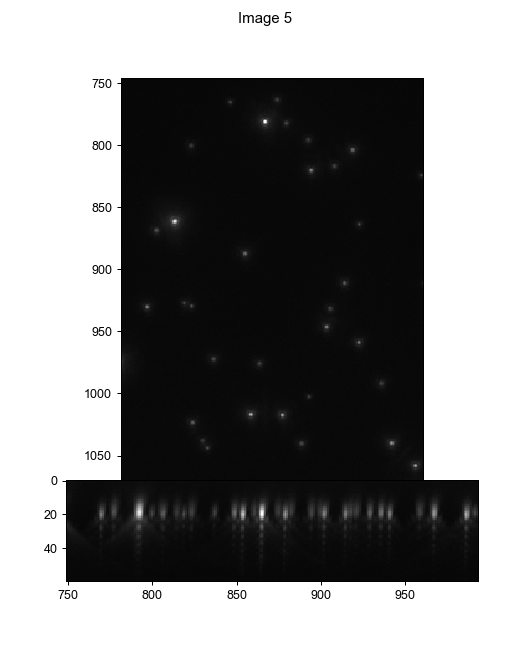

In [8]:
visual_tools.imshow_mark_3d_v2(ims)

In [9]:
from ImageAnalysis3.spot_tools.fitting import fit_fov_image, get_seeds

In [ ]:
## get seeds
ch_id = 1
spots = fit_fov_image(ims[ch_id], all_channels[ch_id], max_num_seeds=1000,
                      use_percentile=True, th_seed_per=99, )

-- start fitting spots in channel:647, 1000 seeded, 

E:\Users\puzheng\Documents\ImageAnalysis3\External\Fitting_v4.py:285: RuntimeWarning: overflow encountered in exp
  self.f = np.exp(bk)+self.f0


In [14]:
spots

array([[ 8.2510125e+04,  1.6939539e+01,  9.6706146e+02, ...,
        -3.8450543e-02, -5.0699636e-02,  2.8553125e+03],
       [ 8.3483023e+04,  1.7947090e+01,  9.6907880e+02, ...,
        -4.4289008e-02, -1.8164406e-02,  2.8677622e+03],
       [ 8.5517539e+04,  1.6296223e+01,  5.3092316e+02, ...,
        -8.2251653e-02, -3.0160872e-02,  3.1705459e+03],
       ...,
       [ 2.2187666e+04,  2.6500000e+01,  1.5495715e+03, ...,
        -6.3225771e-03,  5.7456829e-02,  3.3559797e+03],
       [ 2.3952270e+04,  2.8721371e+01,  1.3240392e+03, ...,
        -2.6762597e-02,  7.8466207e-02,  2.2035388e+03],
       [ 2.0890184e+04,  2.4500000e+01,  5.1792224e+02, ...,
        -1.4674464e-01,  5.3949930e-02,  2.9055981e+03]], dtype=float32)

In [15]:
## visualize
coord_dict = {'coords':[np.flipud(_spot[1:4]) for _spot in spots],
              'class_ids':list(np.zeros(len(spots),dtype=np.int)),
             }

visual_tools.imshow_mark_3d_v2([ims[ch_id]], 
                               given_dic=coord_dict,
                               save_file=None,
                               )


<IPython.core.display.Javascript object>